In [1]:
install.packages('ggcorrplot')
install.packages("expss")



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘checkmate’, ‘htmlTable’, ‘matrixStats’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Use 'expss_output_viewer()' to display tables in the RStudio Viewer.
 To return to the console output, use 'expss_output_default()'.

Loading required package: xml2
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()        masks expss::between()
✖ dplyr::compu

ERROR: Error in library(GGally): there is no package called ‘GGally’


In [105]:
install.packages('e1071', dependencies = TRUE)

also installing the dependencies ‘mlbench’, ‘SparseM’, ‘slam’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
install.packages('fastDummies')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [106]:
library(expss)
library(rvest)
library(repr)
library(tidyverse)
library(stringr)
library(forcats)
library(DBI)
library(RPostgres)
library(lubridate)
library(dplyr)
library(caret)
library(ggcorrplot)

library(fastDummies)

In [83]:

unscaled_diabetes <- read_csv("/Users/Kantemirovs/Desktop/diabetes_data_upload.csv")
head(unscaled_diabetes)

Parsed with column specification:
cols(
  Age = col_double(),
  Gender = col_character(),
  Polyuria = col_character(),
  Polydipsia = col_character(),
  `sudden weight loss` = col_character(),
  weakness = col_character(),
  Polyphagia = col_character(),
  `Genital thrush` = col_character(),
  `visual blurring` = col_character(),
  Itching = col_character(),
  Irritability = col_character(),
  `delayed healing` = col_character(),
  `partial paresis` = col_character(),
  `muscle stiffness` = col_character(),
  Alopecia = col_character(),
  Obesity = col_character(),
  class = col_character()
)


Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


In [84]:
names(unscaled_diabetes) <- c("Age", "Gender", "polyuria", "polydipsia", "weight_loss",
               "weakness", "polyphagia", "genital_thrush", "blurring", "itching", "irritability",
               "delayed_healing", "partial_paresis",
                 "stiffness", "alopecia", "obesity", "class")

In [85]:
unscaled_diabetes<- dummy_cols(unscaled_diabetes, select_columns = "Gender")
unscaled_diabetes<-unscaled_diabetes%>%
                  select(-Gender)

In [86]:
unscaled_diabetes$gen_z <- ifelse(unscaled_diabetes$Age >= 8 & unscaled_diabetes$Age <= 25, 1, 0)
unscaled_diabetes$mill <- ifelse(unscaled_diabetes$Age >= 26 & unscaled_diabetes$Age <= 40, 1, 0)
unscaled_diabetes$gen_x <- ifelse(unscaled_diabetes$Age >= 41 & unscaled_diabetes$Age <= 55, 1, 0)
unscaled_diabetes$baby_boomers <- ifelse(unscaled_diabetes$Age >= 56 & unscaled_diabetes$Age <= 74, 1, 0)
unscaled_diabetes$silent <- ifelse(unscaled_diabetes$Age >= 75 & unscaled_diabetes$Age <= 94, 1, 0)
unscaled_diabetes<-unscaled_diabetes%>%
                  select(-Age)


In [87]:
unscaled_diabetes%>%head()

polyuria,polydipsia,weight_loss,weakness,polyphagia,genital_thrush,blurring,itching,irritability,delayed_healing,...,alopecia,obesity,class,Gender_Female,Gender_Male,gen_z,mill,gen_x,baby_boomers,silent
No,Yes,No,Yes,No,No,No,Yes,No,Yes,...,Yes,Yes,Positive,0,1,0,1,0,0,0
No,No,No,Yes,No,No,Yes,No,No,No,...,Yes,No,Positive,0,1,0,0,0,1,0
Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,...,Yes,No,Positive,0,1,0,0,1,0,0
No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,No,Positive,0,1,0,0,1,0,0
Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,Yes,Yes,Positive,0,1,0,0,0,1,0
Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,Yes,Positive,0,1,0,0,1,0,0


In [88]:
convertToNumeric <- function(x){
    ifelse(x == "Yes" | x == "Positive", 1,0)
}

dfToNumeric <- unscaled_diabetes %>%
    select_if(is.character) %>%
    mutate_all(convertToNumeric)


In [89]:
dfToNumeric$gen_z<-unscaled_diabetes$gen_z 
dfToNumeric$mill<-unscaled_diabetes$mill
dfToNumeric$gen_x<-unscaled_diabetes$gen_x
dfToNumeric$baby_boomers<-unscaled_diabetes$baby_boomers
dfToNumeric$silent<-unscaled_diabetes$silent
dfToNumeric$Gender_Female<-unscaled_diabetes$Gender_Female
dfToNumeric$Gender_Male<-unscaled_diabetes$Gender_Male


In [90]:
dfToNumeric%>%
head()

polyuria,polydipsia,weight_loss,weakness,polyphagia,genital_thrush,blurring,itching,irritability,delayed_healing,...,alopecia,obesity,class,gen_z,mill,gen_x,baby_boomers,silent,Gender_Female,Gender_Male
0,1,0,1,0,0,0,1,0,1,...,1,1,1,0,1,0,0,0,0,1
0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
1,0,0,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
0,0,1,1,1,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1,1,1,1,1,0,1,1,1,1,...,1,1,1,0,0,0,1,0,0,1
1,1,0,1,1,0,1,1,0,1,...,1,1,1,0,0,1,0,0,0,1


In [91]:
dfToNumeric<-dfToNumeric%>% select(polyuria,polydipsia,weight_loss,weakness,polyphagia,genital_thrush,blurring,itching,irritability,delayed_healing,partial_paresis,stiffness,alopecia,obesity,gen_z,mill,gen_x,baby_boomers,silent,Gender_Female,Gender_Male,class)


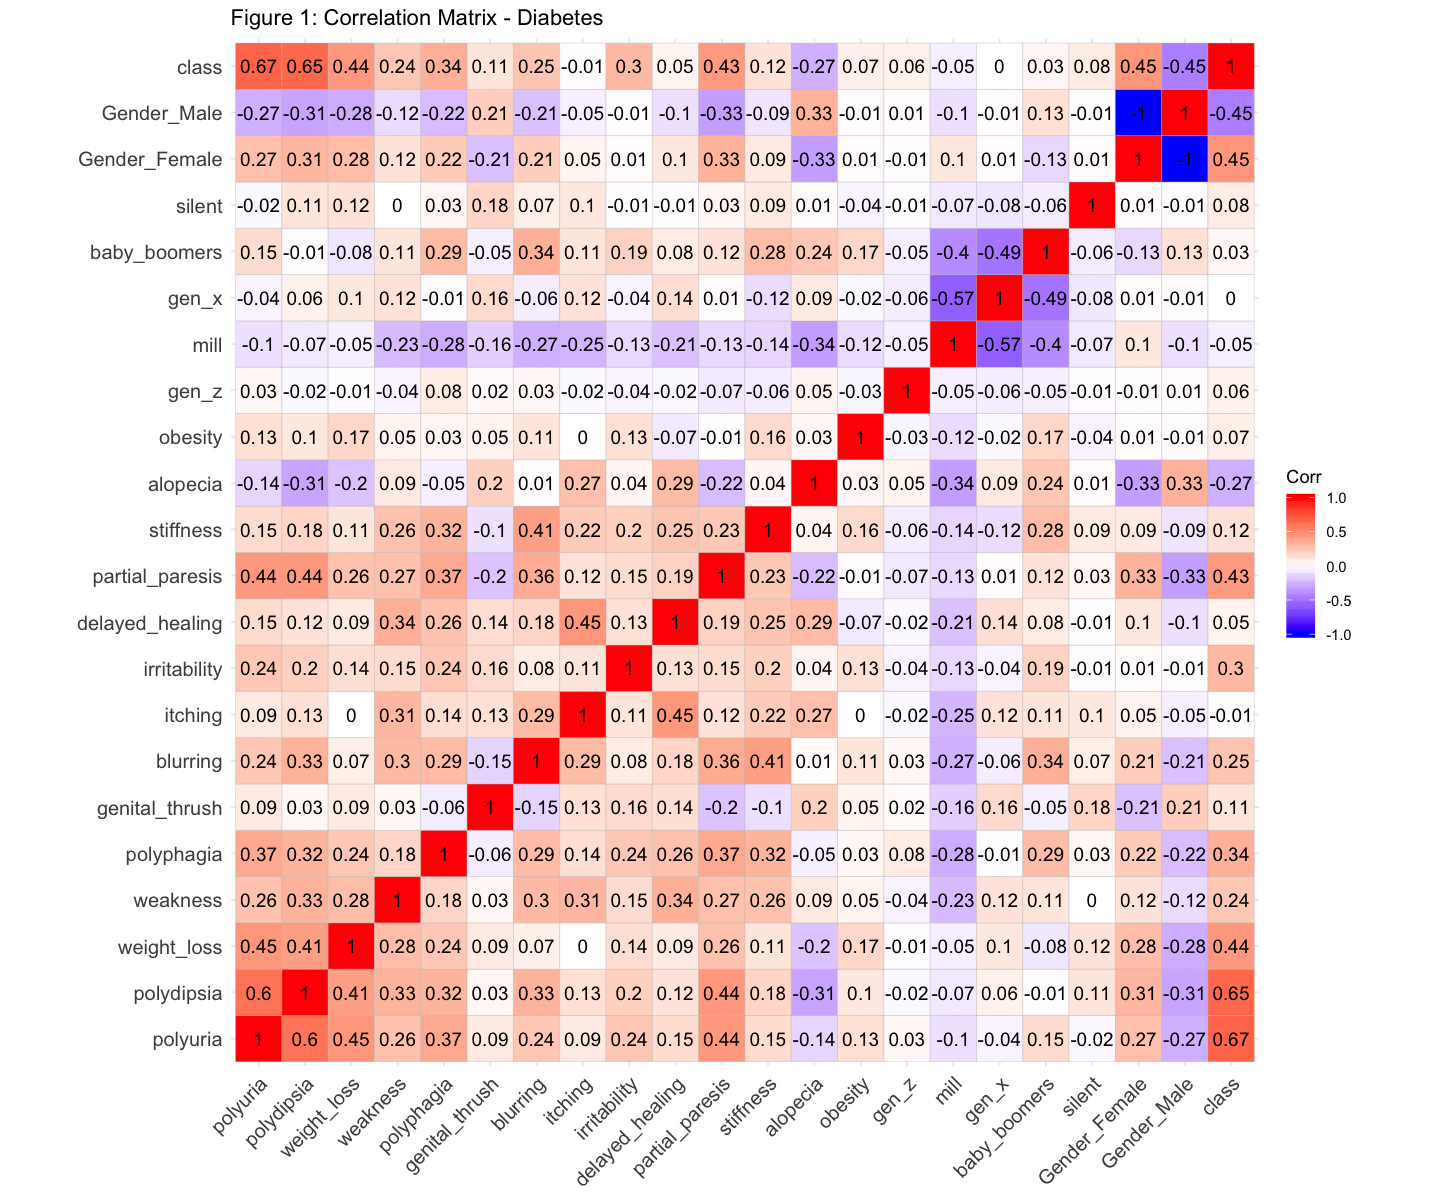

In [92]:
corr_red <- dfToNumeric %>%
    cor() 
options(repr.plot.width = 12, repr.plot.height = 10)
ggcorrplot(corr_red,lab = TRUE,
           title = "Figure 1: Correlation Matrix - Diabetes")

In [93]:
dfToNumeric<-dfToNumeric%>%
                mutate(class = as.factor(class)) 

In [94]:
df<- select(dfToNumeric,Gender_Female,Gender_Male, alopecia, partial_paresis, blurring,polyphagia,polyuria,polydipsia,weight_loss,weakness,class)
head(df)

df%>% 
    tab_cells(Gender_Female,Gender_Male, alopecia, partial_paresis, blurring,polyphagia,polyuria,polydipsia,weight_loss,weakness) %>%
    tab_cols(total(label = "Total| |"), class) %>% 
    tab_stat_fun(Mean = w_mean, "# of Observations" = w_n, method = list) %>%
    tab_pivot() %>%
    set_caption("Table 1: Summary statistics (Diabetes)")

Gender_Female,Gender_Male,alopecia,partial_paresis,blurring,polyphagia,polyuria,polydipsia,weight_loss,weakness,class
0,1,1,0,0,0,0,1,0,1,1
0,1,1,1,1,0,0,0,0,1,1
0,1,1,0,0,1,1,0,0,1,1
0,1,0,0,0,1,0,0,1,1,1
0,1,1,1,1,1,1,1,1,1,1
0,1,1,0,1,1,1,1,0,1,1


Table 1: Summary statistics (Diabetes)                                                                                                       
 |                 | Total |                   | class |                   |      |                   |
 |                 |       |                   |     0 |                   |    1 |                   |
 |                 |  Mean | # of Observations |  Mean | # of Observations | Mean | # of Observations |
 | --------------- | ----- | ----------------- | ----- | ----------------- | ---- | ----------------- |
 |   Gender_Female |   0.4 |               520 |   0.1 |               200 |  0.5 |               320 |
 |     Gender_Male |   0.6 |               520 |   0.9 |               200 |  0.5 |               320 |
 |        alopecia |   0.3 |               520 |   0.5 |               200 |  0.2 |               320 |
 | partial_paresis |   0.4 |               520 |   0.2 |               200 |  0.6 |               320 |
 |        blurring |   0.4 |               520 |   0.3 |               200 |  0.5 |               320 |
 |      polyphagia |   0.5 |               520 |   0.2 |               200 |  0.6 |               320 |
 |        polyuria |   0.5 |               520 |   0.1 |               200 |  0.8 |               320 |
 |      polydipsia |   0.4 |               520 |   0.0 |               200 |  0.7 |               320 |
 |     weight_loss |   0.4 |               520 |   0.1 |               200 |  0.6 |               320 |
 |        weakness |   0.6 |               520 |   0.4 |               200 |  0.7 |               320 |

In [95]:
set.seed(1234)
set_rows_diabetes <- df%>%
    select(class) %>%
    unlist() %>%
    createDataPartition(p = 0.75, list = FALSE)
training_set_df <- df %>%
    slice(set_rows_diabetes)
test_set_df <- df %>%
    slice(-set_rows_diabetes)

In [96]:
glimpse(training_set_df)

Rows: 390
Columns: 11
$ Gender_Female   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Gender_Male     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ alopecia        <dbl> 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,…
$ partial_paresis <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,…
$ blurring        <dbl> 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,…
$ polyphagia      <dbl> 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,…
$ polyuria        <dbl> 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,…
$ polydipsia      <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,…
$ weight_loss     <dbl> 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,…
$ weakness        <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,…
$ class           <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…


In [97]:
glimpse(test_set_df)

Rows: 130
Columns: 11
$ Gender_Female   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,…
$ Gender_Male     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,…
$ alopecia        <dbl> 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,…
$ partial_paresis <dbl> 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,…
$ blurring        <dbl> 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,…
$ polyphagia      <dbl> 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,…
$ polyuria        <dbl> 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,…
$ polydipsia      <dbl> 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,…
$ weight_loss     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,…
$ weakness        <dbl> 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,…
$ class           <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…


In [98]:
scale_transformer <- preProcess(training_set_df, method = c("center", "scale")) 
training_set_df<- predict(scale_transformer, training_set_df)
test_set_df<- predict(scale_transformer, test_set_df)

In [99]:
X_train<- training_set_df %>% 
  select(-class) %>% 
  data.frame()
Y_train <- training_set_df %>% 
  select(class) %>% 
  unlist()

In [100]:
train_control <- trainControl(method = 'cv',number = 5)

In [107]:
set.seed(1234)
ks <- data.frame(k = seq(from = 10, to = 250, by = 5))
choose_k_df <- train(x = X_train,
                      y = Y_train,
                      method = "knn",
                      tuneGrid = ks,
                      trControl = train_control)

In [108]:
k_accuracies_df <- choose_k_df$results %>%
                    select(k, Accuracy)

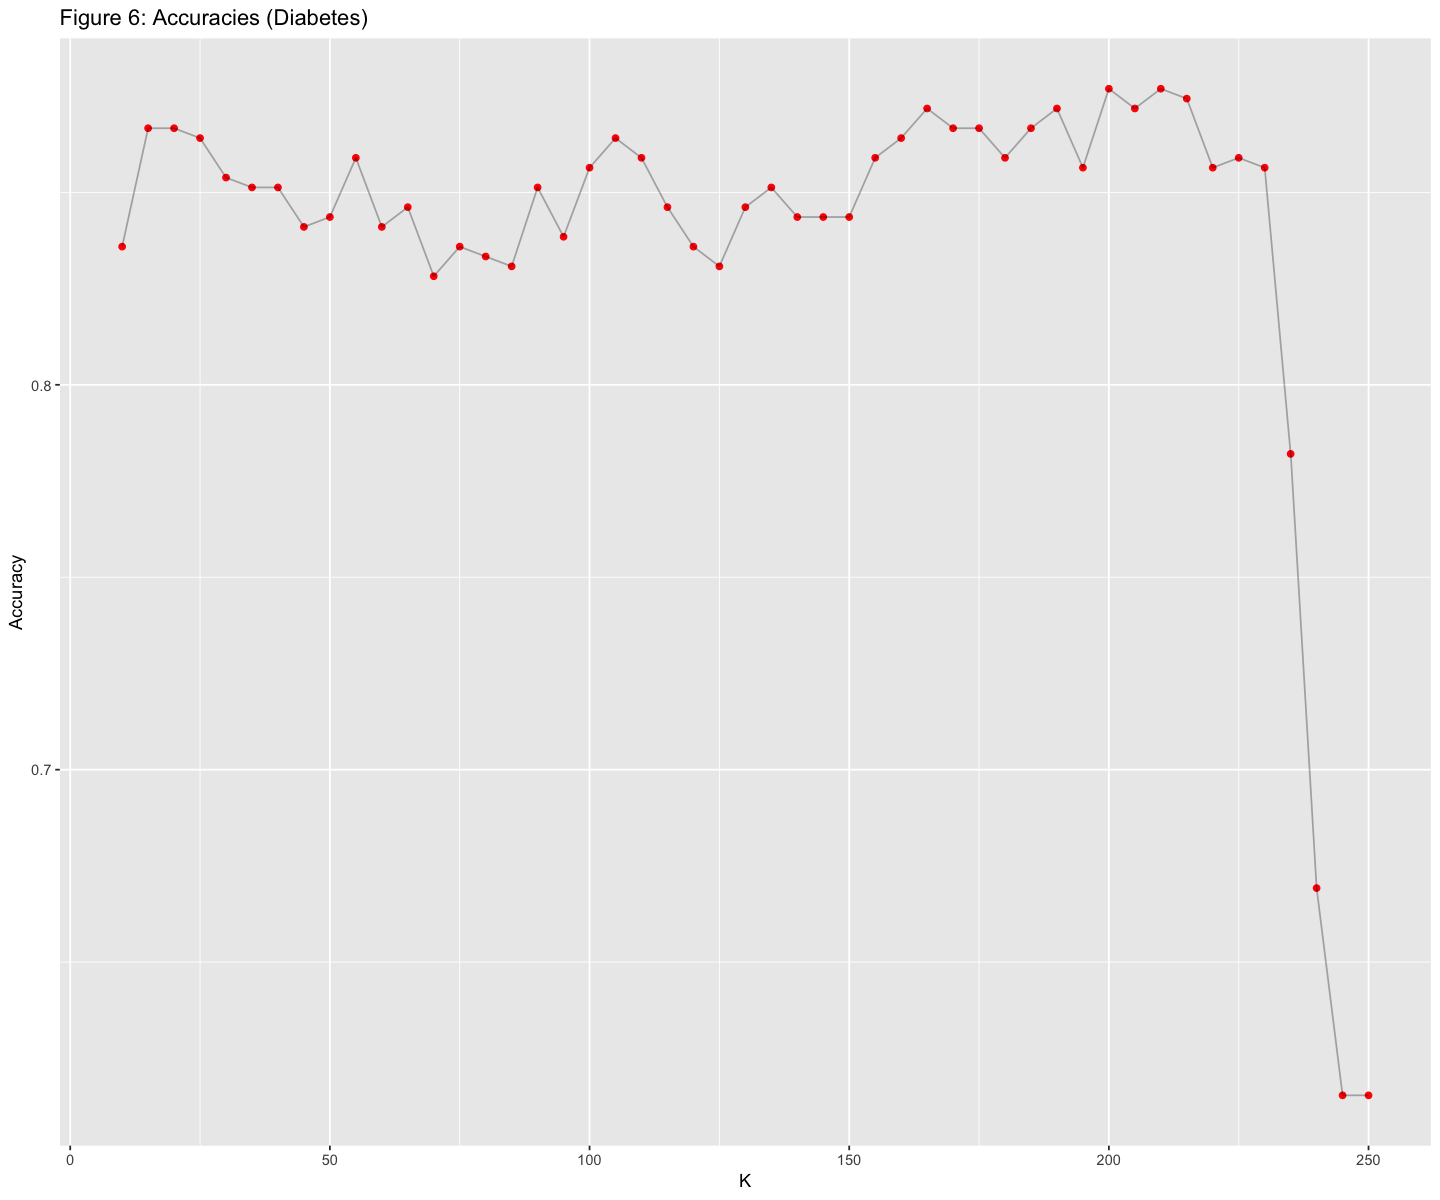

In [109]:
choose_k_plot<- ggplot(k_accuracies_df, aes(x = k, y = Accuracy)) +
                        geom_point(color = 'red') +
                        geom_line(alpha = 0.3) +
                        xlab("K") +
                        ggtitle("Figure 6: Accuracies (Diabetes)")
choose_k_plot

In [110]:
best_k <- choose_k_df$results %>%
    filter(Accuracy == max(Accuracy)) %>%
    select(k) %>%
    unlist()
best_k

k1  k2 
200 210

In [115]:
model<- train(x = X_train, 
                   y = Y_train,
                   method = 'knn', 
                   tuneGrid = data.frame(k = best_k),
                   trControl = train_control)
model

k-Nearest Neighbors 

390 samples
 10 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 312, 312, 312, 312, 312 
Resampling results across tuning parameters:

  k    Accuracy   Kappa    
  200  0.8538462  0.6976968
  210  0.8512821  0.6923432

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 200.

In [118]:
X_test <- test_set_df%>%
    select(-class) %>%
    data.frame()
Y_test <- test_set_df %>% 
  select(class) %>% 
  unlist()
Y_test_predicted <- predict(object = model, X_test)